DATA PREPROCESSING

In [ ]:
##Data Preprocessing
#import the libraries
import pandas as pd #import datasets
import numpy as np #working with arrays
import matplotlib.pyplot as plt #charts
import tensorflow as tf #for artificial neural network

In [ ]:
#import datasets
dataset = pd.read_csv('dataset.csv')
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    270 non-null    int64  
 1   age                                   270 non-null    int64  
 2   sex                                   270 non-null    int64  
 3   chest                                 270 non-null    int64  
 4   resting_blood_pressure                270 non-null    int64  
 5   serum_cholestoral                     270 non-null    int64  
 6   fasting_blood_sugar                   270 non-null    int64  
 7   resting_electrocardiographic_results  270 non-null    int64  
 8   maximum_heart_rate_achieved           270 non-null    int64  
 9   exercise_induced_angina               270 non-null    int64  
 10  oldpeak                               270 non-null    float64
 11  slope              

In [ ]:
#taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

In [ ]:
#ENCODE CATEGORICAL DATA

#encode Independent Variable
"""
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
"""

#encode Dependent Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

Text(0, 0.5, 'Counts')

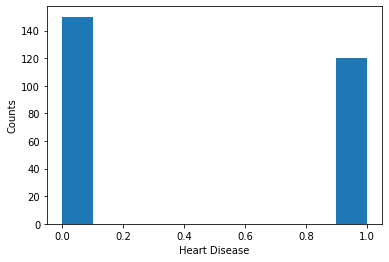

In [ ]:
# Generate data on commute times.

commutes = pd.Series(y)
#commutes.plot.hist(grid=True, bins=20,color='#607c8e')
commutes.plot.hist()
plt.xlabel('Heart Disease')
plt.ylabel('Counts')

In [ ]:
#SPLIT TRAIN & TEST DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [ ]:
#Feature Scaling
#standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

CLASSIFIER

In [ ]:
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state=0)

#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)

#from sklearn.svm import SVC
#classifier = SVC(kernel='linear', random_state = 0)

#from sklearn.svm import SVC
#classifier = SVC(kernel='rbf', random_state = 0)

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb1 = GaussianNB()
nb2 = GaussianNB(var_smoothing=1)
nb3 = GaussianNB(var_smoothing=10)
nb1.fit(X_train , y_train)
nb2.fit(X_train , y_train)
nb3.fit(X_train , y_train)

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth = 1)
dt3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth = 10)
dt1.fit(X_train, y_train)
dt2.fit(X_train, y_train)
dt3.fit(X_train, y_train)

#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

#classifier1.fit(X_train, y_train)
#classifier2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1 = nb1.predict(X_test)
y_pred2 = nb2.predict(X_test)
y_pred3 = nb3.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)
print('Naive Bayes: ')
print('Confusion Matrix: \n',cm1,'\n\n',cm2,'\n\n',cm3,'\n')
acc1 = accuracy_score(y_test, y_pred1)
acc2 = accuracy_score(y_test, y_pred2)
acc3 = accuracy_score(y_test, y_pred3)
print('Accuracy: ','\n',acc1,'\n\n',acc2,'\n\n',acc3)

#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred4 = dt1.predict(X_test)
y_pred5 = dt2.predict(X_test)
y_pred6 = dt3.predict(X_test)
cm4 = confusion_matrix(y_test, y_pred4)
cm5 = confusion_matrix(y_test, y_pred5)
cm6 = confusion_matrix(y_test, y_pred6)
print('\n Decision Tree: ')
print('Confusion Matrix: \n',cm4,'\n\n',cm5,'\n\n',cm6,'\n')
acc4 = accuracy_score(y_test, y_pred4)
acc5 = accuracy_score(y_test, y_pred5)
acc6 = accuracy_score(y_test, y_pred6)
print('Accuracy: ','\n',acc4,'\n\n',acc5,'\n\n',acc6)

Naive Bayes: 
Confusion Matrix: 
 [[28  3]
 [ 4 19]] 

 [[29  2]
 [ 7 16]] 

 [[30  1]
 [11 12]] 

Accuracy:  
 0.8703703703703703 

 0.8333333333333334 

 0.7777777777777778

 Decision Tree: 
Confusion Matrix: 
 [[25  6]
 [ 7 16]] 

 [[21 10]
 [ 9 14]] 

 [[25  6]
 [ 7 16]] 

Accuracy:  
 0.7592592592592593 

 0.6481481481481481 

 0.7592592592592593


In [ ]:
from sklearn.model_selection import cross_val_score
scores1=cross_val_score(nb1, X, y, cv=10)
print(np.mean(scores1))
scores2=cross_val_score(nb2, X, y, cv=10)
print(np.mean(scores2))
scores3=cross_val_score(nb3, X, y, cv=10)
print(np.mean(scores3))

0.8407407407407407
0.5740740740740741
0.5555555555555556


In [ ]:
from sklearn.model_selection import cross_val_score
scores4=cross_val_score(dt1, X, y, cv=10)
print(np.mean(scores4))
scores5=cross_val_score(dt2, X, y, cv=10)
print(np.mean(scores5))
scores6=cross_val_score(dt3, X, y, cv=10)
print(np.mean(scores6))

0.7592592592592593
0.7185185185185186
0.762962962962963


In [ ]:
#Test the model
#Define input

a=270  #ID
b=67   #age
c=1    #sex
d=4    #chest
e=160  #resting_blood_pressure
f=286  #serum_cholestoral
g=0    #fasting_blood_sugar
h=2    #resting_electrocardiographic_results
i=108  #maximum_heart_rate_achieved
j=1    #exercise_induced_angina
k=1.5  #oldpeak
l=2    #slope
m=3    #number_of_major_vessels
n=3    #thal

new_input = [[a,b,c,d,e,f,g,h,i,j,k,l,m,n]]
X_new = sc.transform(new_input)

y_new1 = classifier1.predict(X_new)
y_new2 = classifier2.predict(X_new)

if y_new1==1:                                      
    print('Potential Heart Disease Patient')
else:
    print('Healthy Patient')

if y_new2==1:                                      
    print('Potential Heart Disease Patient')
else:
    print('Healthy Patient')    

Potential Heart Disease Patient
Potential Heart Disease Patient


In [ ]:
X_new = sc.transform(X_test)
y_new = classifier.predict(X_new)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_new)
print(cm)
acc = accuracy_score(y_train, y_new)
print(acc)



[[144   6]
 [  7 113]]
0.9518518518518518


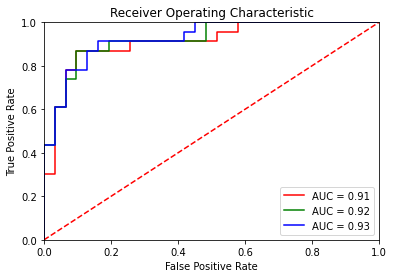

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs1 = nb1.predict_proba(X_test)
probs2 = nb2.predict_proba(X_test)
probs3 = nb3.predict_proba(X_test)
preds1 = probs1[:,1]
preds2 = probs2[:,1]
preds3 = probs3[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, preds2)
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, preds3)
roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)
roc_auc3 = metrics.auc(fpr3, tpr3)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'r', label = 'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'AUC = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


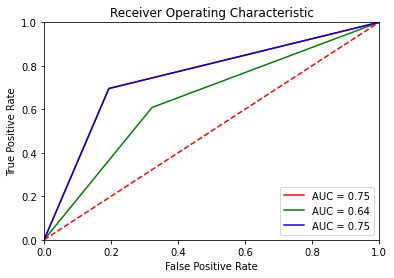

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs4 = dt1.predict_proba(X_test)
probs5 = dt2.predict_proba(X_test)
probs6 = dt3.predict_proba(X_test)
preds4 = probs4[:,1]
preds5 = probs5[:,1]
preds6 = probs6[:,1]
fpr4, tpr4, threshold4 = metrics.roc_curve(y_test, preds4)
fpr5, tpr5, threshold5 = metrics.roc_curve(y_test, preds5)
fpr6, tpr6, threshold6 = metrics.roc_curve(y_test, preds6)
roc_auc4 = metrics.auc(fpr4, tpr4)
roc_auc5 = metrics.auc(fpr5, tpr5)
roc_auc6 = metrics.auc(fpr6, tpr6)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr4, tpr4, 'r', label = 'AUC = %0.2f' % roc_auc4)
plt.plot(fpr5, tpr5, 'g', label = 'AUC = %0.2f' % roc_auc5)
plt.plot(fpr6, tpr6, 'b', label = 'AUC = %0.2f' % roc_auc6)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()